In [1]:
import warnings; warnings.filterwarnings("ignore", message="Initializing zero-element tensors is a no-op")
import pandas as pd
import torch
import os 

from models.faceresnet18 import FaceResNet18
from models.faceresnet50 import FaceResNet50, load_
from eval_utils import eval_epoch
from utils import transform

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

IMAGES_PATH = './data/PINS/105_classes_pins_dataset/'
DF_PATH = './data/PINS/'
CHECKPOINTS_PATH = './checkpoints/'

In [2]:
model = FaceResNet50().load_checkpoint(os.path.join(CHECKPOINTS_PATH, 'epoch_30.pt')).to(device)

<All keys matched successfully>

In [3]:
val_df = pd.read_csv(os.path.join(DF_PATH, 'val.csv'))
val_df['path'] = val_df['path'].apply(lambda x: os.path.join(IMAGES_PATH, x))

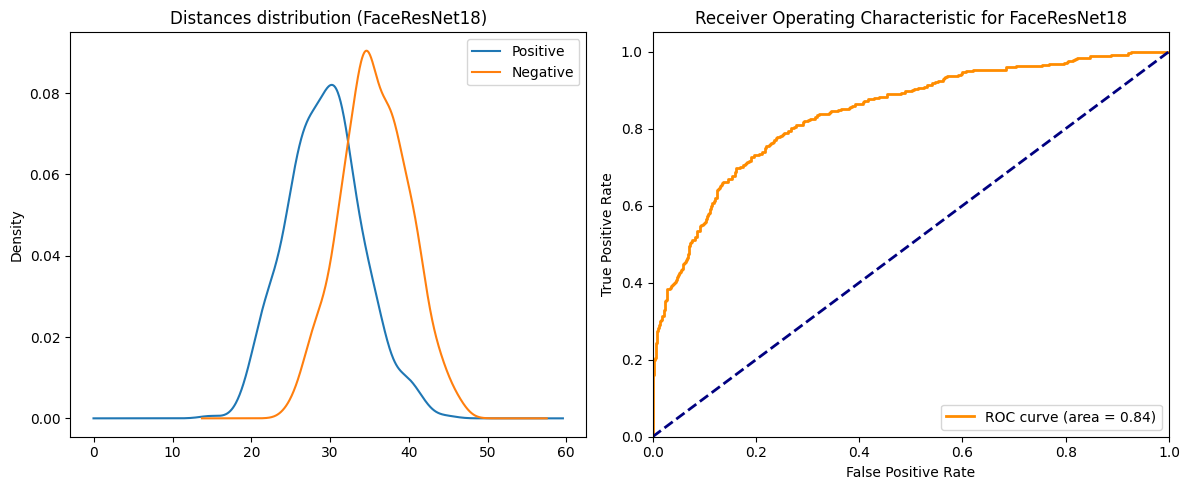

Target FAR: 1e-03 | Threshold: 24.6733
[FaceResNet18] Accuracy: 0.5791
[FaceResNet18] VAL: 0.1582

[FaceResNet18] Positive mean: 29.2913 ± 4.7304
[FaceResNet18] Negative mean: 35.6475 ± 4.2748


In [4]:
eval_epoch(
    model=model, 
    val_df=val_df, 
    transform=transform, 
    n_pairs=1024, 
    batch_size=128,
    device=device, 
    target_far=1e-3
)